In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class descent:
    def __init__(self, lr, h=1e-6):
        self.lr = lr
        self.h = h
    
    def n_D(self, f, x):
        return (f(x+self.h)-f(x-self.h))/(2*self.h)

    def update(self, f, x):
        df =  self.n_D(f, x)
        return x - self.lr*df
        
    def __str__(self):
        return '강하법(lr = %s)' %self.lr

In [7]:
class one_variable_ftn:
    
    def __init__(self, ftn, opti):
        self.ftn = ftn
        self.opti = opti
        
    def run(self, x0, iteration):
        self.xs = [x0]
        for j in range(iteration):
            self.xs.append(self.opti.update(self.ftn, self.xs[-1]))
        print(""" %s에서 시작해서 %s번 %s을 적용한 결과는 %.3f입니다.
        """%(x0, iteration, self.opti, self.xs[-1]))
        pass

    def visualize(self, xi, xe):
        x = np.linspace(xi,xe,int((xe-xi)*100))
        y = [self.ftn(xx) for xx in x]
        plt.plot(x, y, 'k-')
        ys = [self.ftn(xx) for xx in self.xs] 
        plt.plot(self.xs, ys, 'r*')
        return plt.show()

    def history(self):
        for j,x in enumerate(self.xs):
            print("%s번 %s를 적용한 결과는 %.3f" %(j, self.opti,  x))
        pass

In [8]:
opti1 = descent(0.01)
print(opti1)
f1 = lambda x : x**2

강하법(lr = 0.01)


In [9]:
ex1 = one_variable_ftn(f1, opti1)

In [9]:
ex1.run(2, 100)

 2에서 시작해서 100번 강하법을 적용한 결과는 0.265입니다.
        


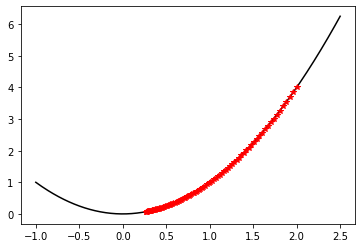

In [10]:
ex1.visualize(-1, 2.5)

In [11]:
ex1.history()

0번 강하법를 적용한 결과는 2.000
1번 강하법를 적용한 결과는 1.960
2번 강하법를 적용한 결과는 1.921
3번 강하법를 적용한 결과는 1.882
4번 강하법를 적용한 결과는 1.845
5번 강하법를 적용한 결과는 1.808
6번 강하법를 적용한 결과는 1.772
7번 강하법를 적용한 결과는 1.736
8번 강하법를 적용한 결과는 1.702
9번 강하법를 적용한 결과는 1.667
10번 강하법를 적용한 결과는 1.634
11번 강하법를 적용한 결과는 1.601
12번 강하법를 적용한 결과는 1.569
13번 강하법를 적용한 결과는 1.538
14번 강하법를 적용한 결과는 1.507
15번 강하법를 적용한 결과는 1.477
16번 강하법를 적용한 결과는 1.448
17번 강하법를 적용한 결과는 1.419
18번 강하법를 적용한 결과는 1.390
19번 강하법를 적용한 결과는 1.362
20번 강하법를 적용한 결과는 1.335
21번 강하법를 적용한 결과는 1.309
22번 강하법를 적용한 결과는 1.282
23번 강하법를 적용한 결과는 1.257
24번 강하법를 적용한 결과는 1.232
25번 강하법를 적용한 결과는 1.207
26번 강하법를 적용한 결과는 1.183
27번 강하법를 적용한 결과는 1.159
28번 강하법를 적용한 결과는 1.136
29번 강하법를 적용한 결과는 1.113
30번 강하법를 적용한 결과는 1.091
31번 강하법를 적용한 결과는 1.069
32번 강하법를 적용한 결과는 1.048
33번 강하법를 적용한 결과는 1.027
34번 강하법를 적용한 결과는 1.006
35번 강하법를 적용한 결과는 0.986
36번 강하법를 적용한 결과는 0.966
37번 강하법를 적용한 결과는 0.947
38번 강하법를 적용한 결과는 0.928
39번 강하법를 적용한 결과는 0.910
40번 강하법를 적용한 결과는 0.891
41번 강하법를 적용한 결과는 0.874
42번 강하법를 적용한 결과는 0.856
43번 강하법를 적용한 결과는 0.83

 2에서 시작해서 100번 강하법(lr = 0.01)을 적용한 결과는 0.344입니다.
        


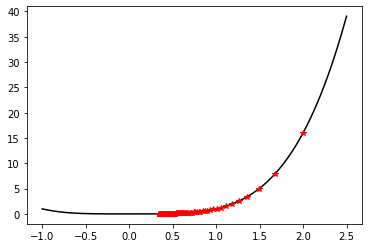

In [10]:
f2 = lambda x : x**4
ex4 = one_variable_ftn(f2,opti1)
ex4.run(2,100)
ex4.visualize(-1,2.5)

In [29]:
def f3(x):
    if x>1:
        return x**2
    elif x>0.2:
        return 1
    else:
        return 25*(x**2)

 2에서 시작해서 200번 강하법(lr = 0.01)을 적용한 결과는 0.986입니다.
        


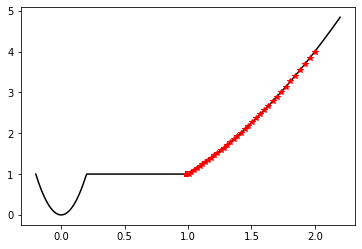

In [31]:
ex5 = one_variable_ftn(f3,opti1)
ex5.run(2,200)
ex5.visualize(-0.2,2.2)

In [13]:
# 뉴턴 방법을 활용한 경사법 
class Newton_descent:
    def __init__(self, h=1e-6):
        self.h = h
        pass
    
    def n_D(self, f, x):
        return (f(x+self.h)-f(x-self.h))/(2*self.h)

    def update(self, f, x):
        a_p = self.n_D(f, x) #f'(x)
        a_p_h = self.n_D(f, x+self.h) #f'(x+h)
        a_p_h2 = self.n_D(f, x-self.h) #f'(x-h)
        a_pp = (a_p_h - a_p_h2)/(2*self.h) #f''(x)
        return x - a_p/a_pp  # x - f'(x)/f''(x)
        
    def __str__(self):
        return '뉴턴방법' 
    

 2에서 시작해서 25번 뉴턴방법을 적용한 결과는 0.000입니다.
        


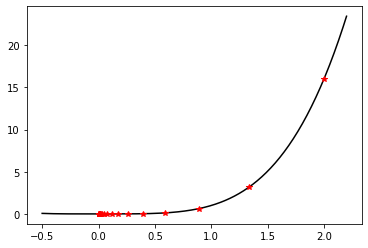

In [34]:
new_opti = Newton_descent()
ex6 = one_variable_ftn(f2,new_opti) #f2 = x^4
ex6.run(2,25)
ex6.visualize(-0.5,2.2)

In [22]:
# Momentum 강하법 
class Momentum_descent():
    def __init__(self, mu, lr, h=1e-6):
        self.previous = 0
        self.mu = mu
        self.lr = lr
        self.h = h
    
    def n_D(self, f, x):
        return (f(x+self.h)-f(x-self.h))/(2*self.h)
    
    def update(self, f, x):
        dx = self.mu * self.previous - self.lr * self.n_D(f,x)
        self.previous = dx
        return x+dx 
    
    def __str__(self):
        return '모멘텀 강하법(mu =%s, lr=%s)' %(self.mu, self.lr) 

 2에서 시작해서 50번 모멘텀 강하법(mu =0.9, lr=0.01)을 적용한 결과는 -0.004입니다.
        


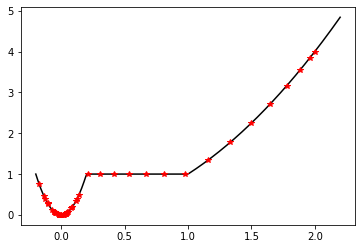

In [35]:
mom_opti = Momentum_descent(0.9, 0.01)
ex7 = one_variable_ftn(f3,mom_opti)
ex7.run(2,50)
ex7.visualize(-0.2,2.2)